Цель

Реализовать классификацию между камнями (R) и металлическими цилиндрами (M) на
основе данных об отражении сигналов радара от поверхностей.
60 входных значений показывают силу отражаемого сигнала под определенным углом.
Входные данные нормализованы и находятся в промежутке от 0 до 1.

Задачи

- Ознакомиться с задачей бинарной классификации
- Загрузить данные
- Создать модель ИНС в tf.Keras
- Настроить параметры обучения
- Обучить и оценить модель
- Изменить модель и провести сравнение. Объяснить результаты

In [35]:
import pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [36]:
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [37]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y) # загрузка входных и выходных данных

In [38]:
model = Sequential()
model.add(Dense(60, input_dim=60, kernel_initializer='random_normal', activation='relu')) # input_dim - количество данных которые передаются, у нас их 60
model.add(Dense(1, kernel_initializer='random_normal', activation='sigmoid')) # kernel_initializer - изначально расставляет веса

In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy']) # эта функция потерь для бинарной классификации либо 0 либо 1

In [40]:
first = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6924 - accuracy: 0.4813 - val_loss: 0.6441 - val_accuracy: 1.0000
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6043 - val_loss: 0.6958 - val_accuracy: 0.4286
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.7433 - val_loss: 0.7111 - val_accuracy: 0.3333
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7594 - val_loss: 0.6884 - val_accuracy: 0.4286
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.7433 - val_loss: 0.7120 - val_accuracy: 0.3810
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7380 - val_loss: 0.7465 - val_accuracy: 0.2857
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.7487 - val_loss: 0.7187 - val_accuracy: 0.3810
Epoch 8/100
1

In [41]:
model1 = Sequential()
model1.add(Dense(30, input_dim=60, kernel_initializer='random_normal', activation='relu'))  # поменял количество нейронов на входном слое
model1.add(Dense(1, kernel_initializer='random_normal', activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
second = model1.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 7ms/step - loss: 0.6943 - accuracy: 0.5027 - val_loss: 0.7088 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.6150 - val_loss: 0.6829 - val_accuracy: 1.0000
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.6417 - val_loss: 0.6770 - val_accuracy: 1.0000
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6684 - val_loss: 0.6830 - val_accuracy: 0.7143
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.7112 - val_loss: 0.6789 - val_accuracy: 0.7143
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7487 - val_loss: 0.6987 - val_accuracy: 0.3810
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.7166 - val_loss: 0.6680 - val_accuracy: 0.7619
Epoch 8/1

In [42]:
model2 = Sequential()
model2.add(Dense(60, input_dim=60, kernel_initializer='random_normal', activation='relu'))
model2.add(Dense(15, kernel_initializer='random_normal', activation='relu'))  # добавил еще один слой с 15 нейронами
model2.add(Dense(1, kernel_initializer='random_normal', activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
third = model2.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.5241 - val_loss: 0.6979 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5294 - val_loss: 0.7056 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5668 - val_loss: 0.7078 - val_accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.6524 - val_loss: 0.7280 - val_accuracy: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6791 - val_loss: 0.7639 - val_accuracy: 0.0000e+00
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.7059 - val_loss: 0.7359 - val_accuracy: 0.2857
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7166 - val_loss: 0.8749 - val_accuracy: 

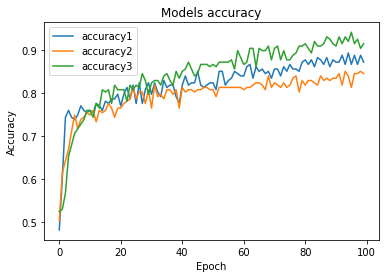

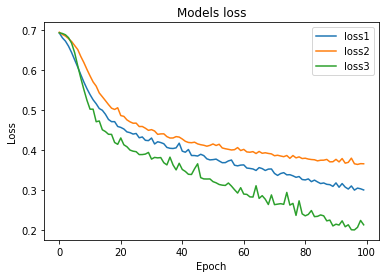

In [43]:
plt.plot(first.history['accuracy'])
plt.plot(second.history['accuracy'])
plt.plot(third.history['accuracy'])
plt.title('Models accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy1', 'accuracy2', 'accuracy3'], loc='best')
plt.show()

plt.plot(first.history['loss'])
plt.plot(second.history['loss'])
plt.plot(third.history['loss'])
plt.title('Models loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss1', 'loss2', 'loss3'], loc='best')
plt.show()